## Project


In [89]:
import os
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import wordcloud
import nltk

**Read data files from two folders(News Articles, Summaries) and put them into table**

- First folders contain articles within each category
- Second folders contain summary of articles within each category

- We decided to make two tables, with the data from two folders
- Later, those two tables combined into single table


In [90]:
article_path = 'BBC News Summary/News Articles'
category = ['business', 'entertainment', 'politics', 'sport', 'tech']

data = []

for category in category:
    category_path = os.path.join(article_path, category)
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        with open(file_path, 'r') as file:
            content = file.read()
            data.append({'Article': content, 'Category': category})

df = pd.DataFrame(data)

In [91]:
df

,Article,Category
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [92]:
summary_path = 'BBC News Summary/Summaries'
categories = ['business', 'entertainment', 'politics', 'sport', 'tech']

data = []

for category in categories:
    category_path = os.path.join(summary_path, category)
    for filename in os.listdir(category_path):
        file_path = os.path.join(category_path, filename)
        with open(file_path, 'r') as file:
            content = file.read()
            data.append({'Summary': content})

df1 = pd.DataFrame(data)

In [93]:
df1

,Summary
0,TimeWarner said fourth quarter sales rose 2% t...
1,The dollar has hit its highest level against t...
2,Yukos' owner Menatep Group says it will ask Ro...
3,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod has reduced the debt it took on to fund...
...,...
2220,BT is introducing two initiatives to help beat...
2221,A third of them read unsolicited junk e-mail a...
2222,This goes to the heart of the European project...
2223,Amit Yoran was director of the National Cyber ...


**Combine the data into one table**


In [94]:
df = pd.concat([df, df1], axis=1)
df = df[['Article', 'Category', 'Summary']]
df

,Article,Category,Summary
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits\n\nBritish A...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code\n\nA new European dire...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns\n\nThe man mak...,tech,Amit Yoran was director of the National Cyber ...


In [95]:
df['Category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

**Data Preprocessing**

- We decided to strip the first sentence before first '\n', and later that sentence become title of the article


In [96]:
article = []
titles = []
for x in df['Article']:
    title = x.split('\n\n')[0].strip()
    titles.append(title)
    article.append(x.replace(title, '').strip())
df['Title'] = titles
df['Article'] = article

In [97]:
df = df[['Title', 'Article', 'Category', 'Summary']]

In [98]:
df

,Title,Article,Category,Summary
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help beat...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to ig...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code,A new European directive could put software wr...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns,The man making sure US computer networks are s...,tech,Amit Yoran was director of the National Cyber ...


In [99]:
df['Article'] = df['Article'].str.replace('\n', ' ')

**Data Cleansing**

- Noise removal and normalize text

- Stopwords

- Lemmatizing

\*Notes : tokenizer is performed in our selected model


Remove noise in dataset and normalize text (lowercase text)


In [100]:
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # remove URL
    text = re.sub(r'<.*?>', '', text) # remove HTML code
    text = re.sub(r'\s+', ' ', text) # remove unwanted space
    text = text.strip() # remove start/end space
    return text

# Apply the clean_text function to the 'Title' and 'Article' columns
df['Title'] = df['Title'].apply(clean_text)
df['Article'] = df['Article'].apply(clean_text)

df

,Title,Article,Category,Summary
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help beat...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to ig...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code,A new European directive could put software wr...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns,The man making sure US computer networks are s...,tech,Amit Yoran was director of the National Cyber ...


In [101]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

df['Article'] = df['Article'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wsusa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [102]:
df

,Title,Article,Category,Summary
0,Ad sales boost Time Warner profit,Quarterly profit at US medium giant TimeWarner...,business,TimeWarner said fourth quarter sales rose 2% t...
1,Dollar gains on Greenspan speech,The dollar ha hit it highest level against the...,business,The dollar has hit its highest level against t...
2,Yukos unit buyer faces loan claim,The owner of embattled Russian oil giant Yukos...,business,Yukos' owner Menatep Group says it will ask Ro...
3,High fuel prices hit BA's profits,British Airways ha blamed high fuel price for ...,business,"Rod Eddington, BA's chief executive, said the ..."
4,Pernod takeover talk lifts Domecq,Shares in UK drink and food firm Allied Domecq...,business,Pernod has reduced the debt it took on to fund...
...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiative to help beat ...,tech,BT is introducing two initiatives to help beat...
2221,Spam e-mails tempt net shoppers,Computer user across the world continue to ign...,tech,A third of them read unsolicited junk e-mail a...
2222,Be careful how you code,A new European directive could put software wr...,tech,This goes to the heart of the European project...
2223,US cyber security chief resigns,The man making sure US computer network are sa...,tech,Amit Yoran was director of the National Cyber ...


**We decided to shuffle the data**


In [103]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [104]:
df

,Title,Article,Category,Summary
0,UK house prices dip in November,"UK house price dipped slightly in November, th...",business,All areas saw a rise in annual house price inf...
1,LSE 'sets date for takeover deal',The London Stock Exchange (LSE) is planning to...,business,A Â£1.3bn offer from Deutsche Boerse has alrea...
2,Harinordoquy suffers France axe,Number eight Imanol Harinordoquy ha been dropp...,sport,Harinordoquy was a second-half replacement in ...
3,Barclays shares up on merger talk,Shares in UK banking group Barclays have risen...,business,Shares in UK banking group Barclays have risen...
4,Campaign 'cold calls' questioned,Labour and the Conservatives are still telepho...,politics,Assistant information commissioner Phil Jones ...
...,...,...,...,...
2220,Robinson answers critics,England captain Jason Robinson ha rubbished su...,sport,"Robinson said: ""We are certainly not on the de..."
2221,Mallon wades into NE vote battle,Middlesbrough mayor Ray Mallon ha been drafted...,politics,But Mr Herron said North East people did not w...
2222,Lib Dems' new election PR chief,The Lib Dems have appointed a senior figure fr...,politics,Mr Walkington said he wanted the party to be r...
2223,Tories reject rethink on axed MP,Sacked MP Howard Flight's local Conservative a...,politics,Mr Flight says he will not stand down as a can...


_Notes : ini sengaja gw cut dulu datanya biar ga kebanyakan. kira-kira pake 1/4 nya aja biar nge-run modelnya lebih cepet_


In [105]:
df = df.iloc[0:500]
df

,Title,Article,Category,Summary
0,UK house prices dip in November,"UK house price dipped slightly in November, th...",business,All areas saw a rise in annual house price inf...
1,LSE 'sets date for takeover deal',The London Stock Exchange (LSE) is planning to...,business,A Â£1.3bn offer from Deutsche Boerse has alrea...
2,Harinordoquy suffers France axe,Number eight Imanol Harinordoquy ha been dropp...,sport,Harinordoquy was a second-half replacement in ...
3,Barclays shares up on merger talk,Shares in UK banking group Barclays have risen...,business,Shares in UK banking group Barclays have risen...
4,Campaign 'cold calls' questioned,Labour and the Conservatives are still telepho...,politics,Assistant information commissioner Phil Jones ...
...,...,...,...,...
495,O'Leary agrees new Villa contract,Aston Villa bos David O'Leary signed a three-a...,sport,"""It was important to me Roy and Steve, an inte..."
496,Broadband steams ahead in the US,More and more Americans are joining the intern...,tech,Broadband over the phone line makes up 11.4 mi...
497,Wilkinson to miss Ireland match,England will have to take on Ireland in the Si...,sport,England will have to take on Ireland in the Si...
498,Microsoft releases patches,Microsoft ha warned PC user to update their sy...,tech,Microsoft has warned PC users to update their ...


**Exploratorial Data Analysis**


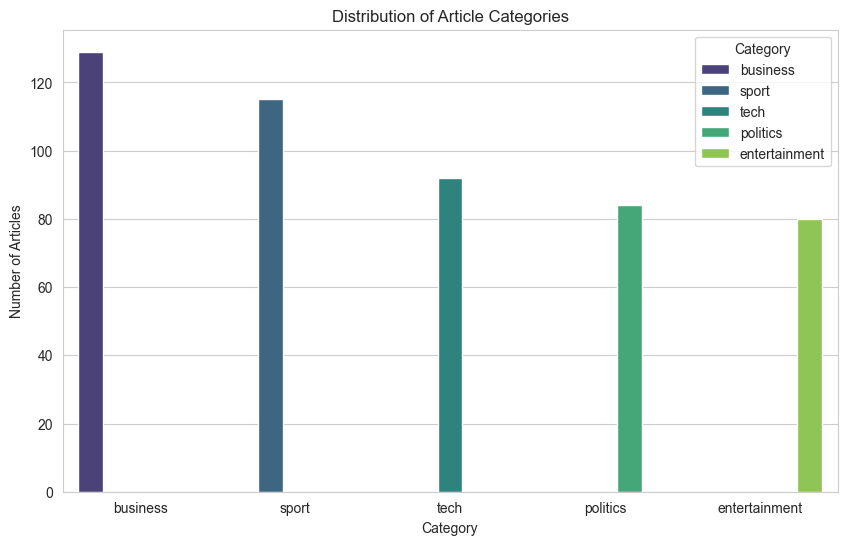

In [106]:
sns.set_style("whitegrid")

category_counts = df['Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis', hue=category_counts.index)
plt.title('Distribution of Article Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

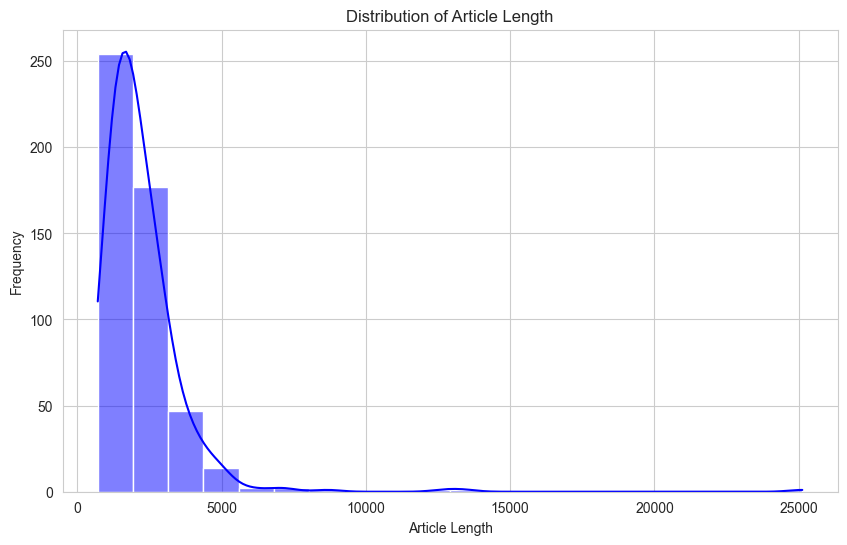

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Article'].apply(len), bins=20, kde=True, color='blue')
plt.title('Distribution of Article Length')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

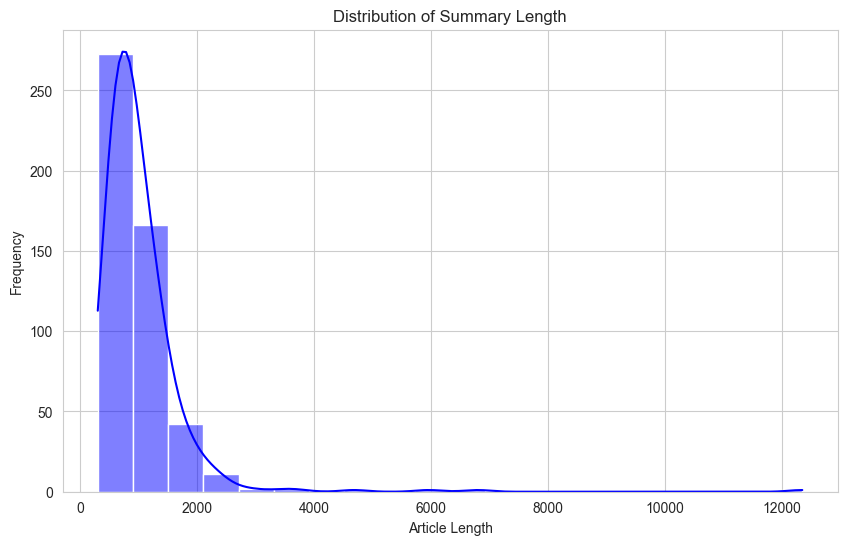

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Summary'].apply(len), bins=20, kde=True, color='blue')
plt.title('Distribution of Summary Length')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

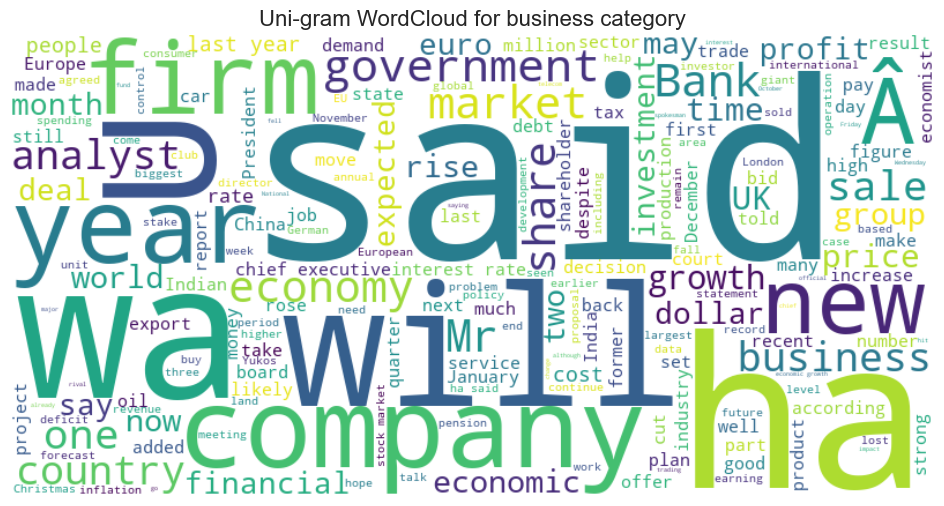

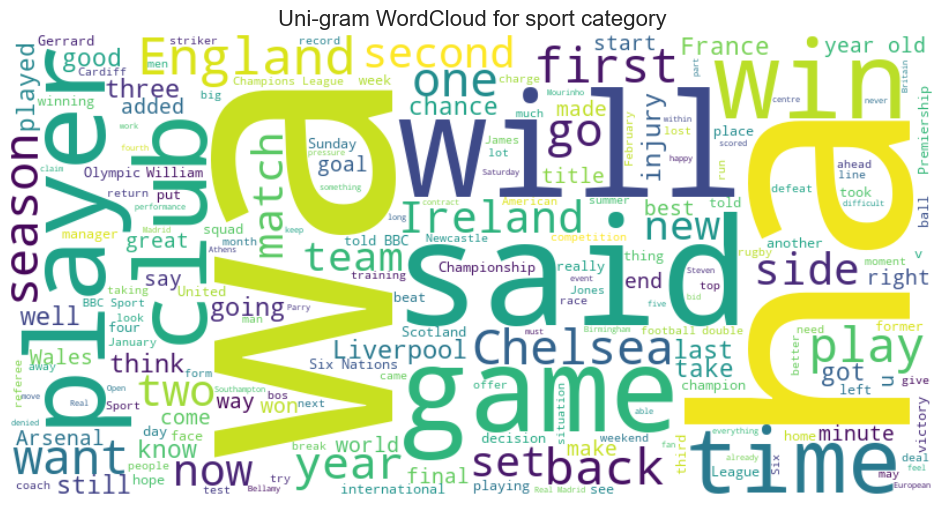

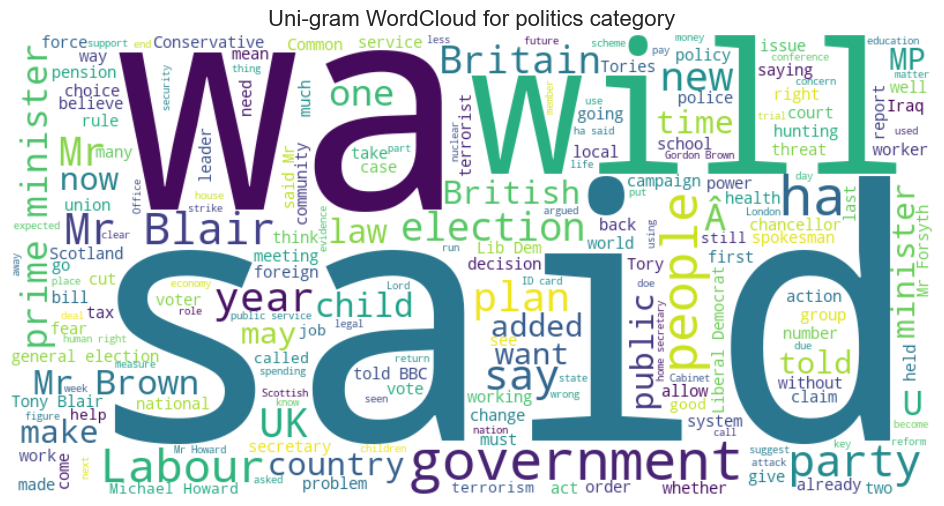

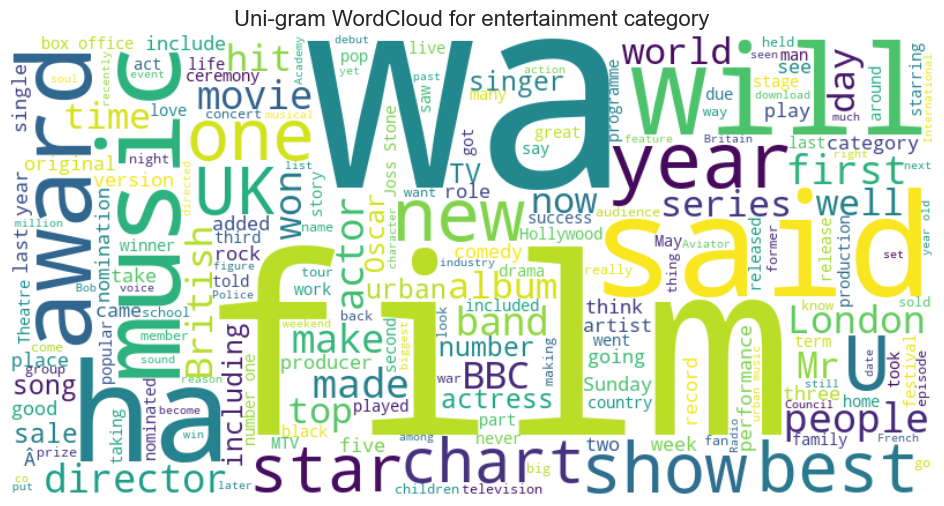

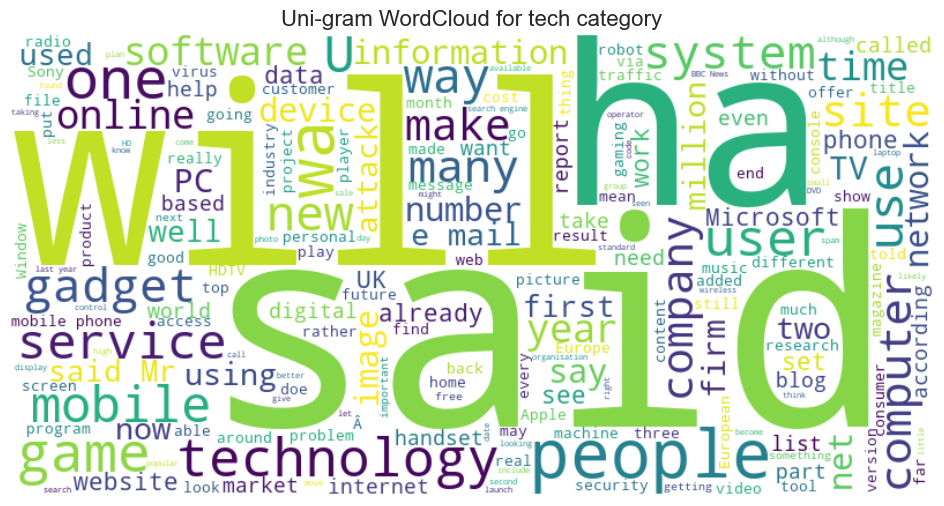

In [109]:
from wordcloud import WordCloud
for category in df['Category'].unique():
    text = ' '.join(df[df['Category'] == category]['Article'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Uni-gram WordCloud for {category} category', fontsize=16)
    plt.axis('off')
    plt.show()

WordCloud visualizations for each category give us some sightings. The most frequent word appeared is "said" word. Maybe because the data source we took was newspaper text, and there were lots of opinions expressed by other people (source person/expert), and quoted by the author. So, the word "said" can become the most frequent word, because the author quotes sentences from source person/expert. When quoting source person/expert words, the author definitely uses the word "said" as an explanation, that the sentence was said by someone (source person/expert)


C:\Users\wsusa\AppData\Local\Temp\ipykernel_9396\2360904681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Article'].apply(analyze_sentiment)


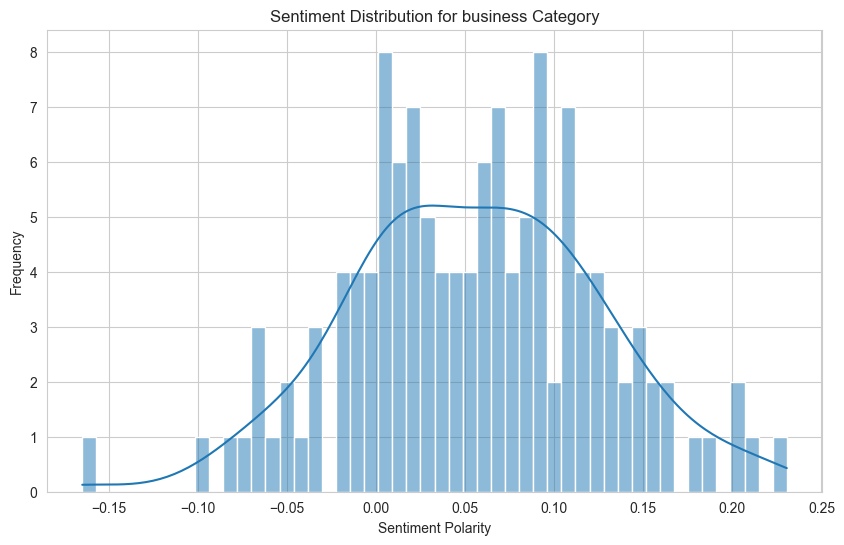

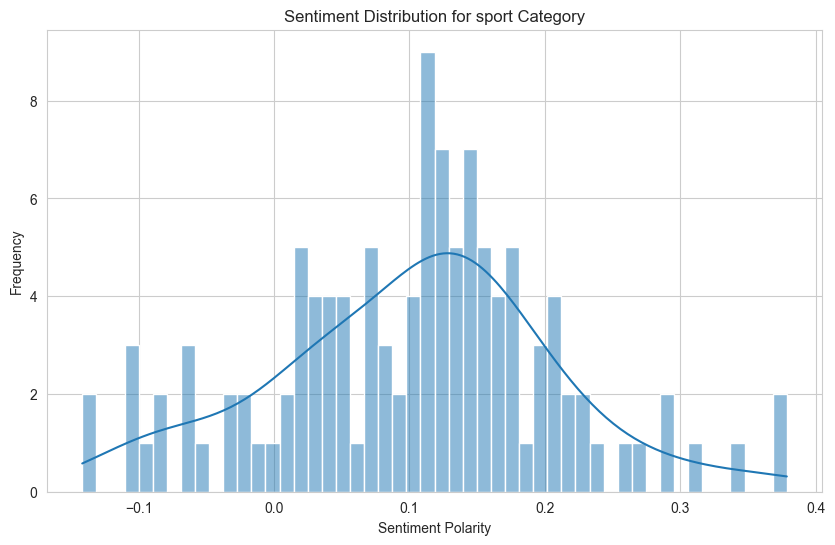

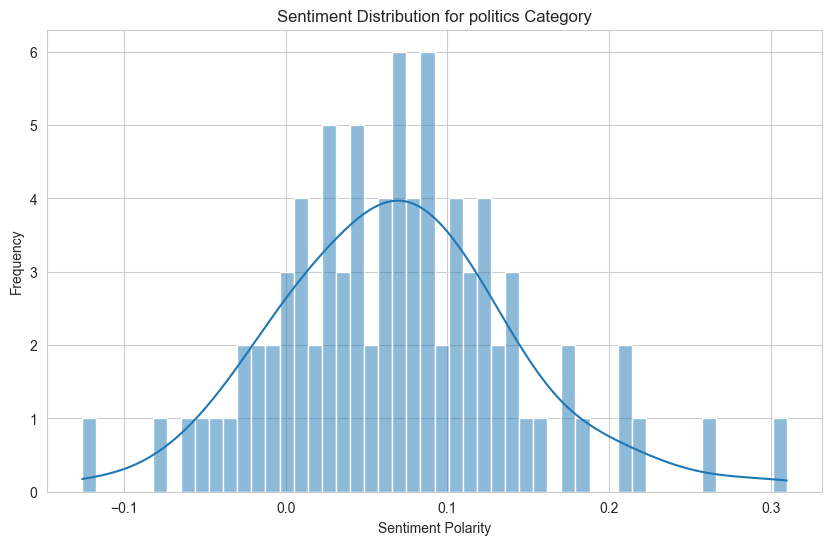

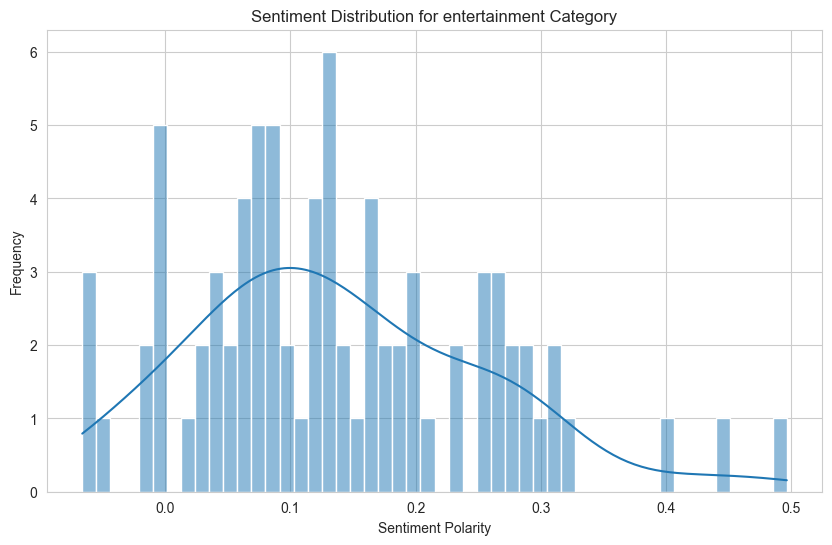

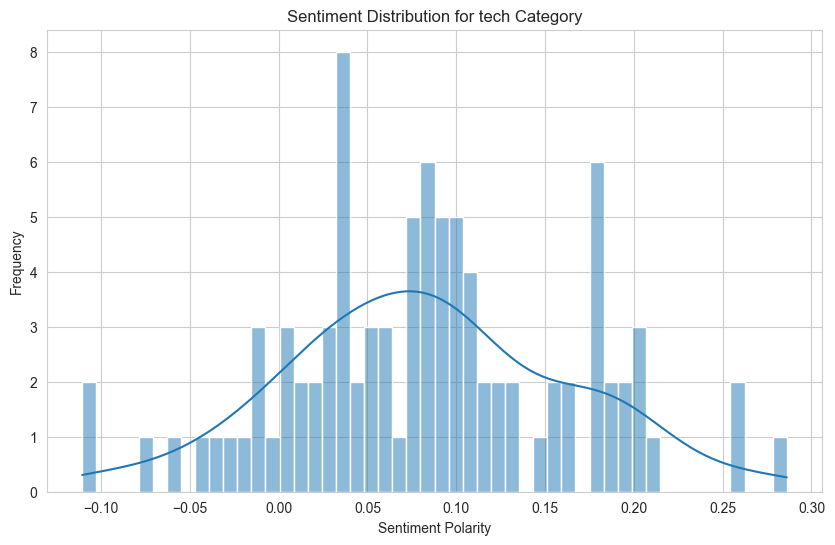

In [110]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['Sentiment'] = df['Article'].apply(analyze_sentiment)

for category in df['Category'].unique():
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['Category'] == category]['Sentiment'], bins=50, kde=True)
    plt.title(f'Sentiment Distribution for {category} Category')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

Sentiment analysis use to determined polarity of a given text, which indicate whether the sentiment of text is positive, negative, or neutral using polarity score:

Positive Sentiment: Polarity score > 0
Negative Sentiment: Polarity score < 0
Neutral Sentiment: Polarity score = 0

In this case, we use TextBlob library that provides a polarity score ranging from -1 (most negative) to 1 (most positive)


From sentiment analysis in each category, we found the polarity usually distributes arond 0-0.1. Which indicates that most of the text in each category usually has neutral sentiment, only few/none had around positive/negative sentiment


In [111]:
df

,Title,Article,Category,Summary,Sentiment
0,UK house prices dip in November,"UK house price dipped slightly in November, th...",business,All areas saw a rise in annual house price inf...,0.104478
1,LSE 'sets date for takeover deal',The London Stock Exchange (LSE) is planning to...,business,A Â£1.3bn offer from Deutsche Boerse has alrea...,0.064700
2,Harinordoquy suffers France axe,Number eight Imanol Harinordoquy ha been dropp...,sport,Harinordoquy was a second-half replacement in ...,0.132222
3,Barclays shares up on merger talk,Shares in UK banking group Barclays have risen...,business,Shares in UK banking group Barclays have risen...,0.058889
4,Campaign 'cold calls' questioned,Labour and the Conservatives are still telepho...,politics,Assistant information commissioner Phil Jones ...,0.048441
...,...,...,...,...,...
495,O'Leary agrees new Villa contract,Aston Villa bos David O'Leary signed a three-a...,sport,"""It was important to me Roy and Steve, an inte...",0.231588
496,Broadband steams ahead in the US,More and more Americans are joining the intern...,tech,Broadband over the phone line makes up 11.4 mi...,0.213824
497,Wilkinson to miss Ireland match,England will have to take on Ireland in the Si...,sport,England will have to take on Ireland in the Si...,0.146429
498,Microsoft releases patches,Microsoft ha warned PC user to update their sy...,tech,Microsoft has warned PC users to update their ...,0.119753


In [112]:
from transformers import BartTokenizer, BartForConditionalGeneration
import numpy as np
from tqdm import tqdm
# Load the small BART model and tokenizer

tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

c:\Python\environments\deep_learning\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Python\environments\deep_learning\lib\site-packages\transformers\modeling_utils.py:446: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted b

In [113]:
import evaluate

rouge = evaluate.load("rouge")

def generate_summary(article):
    inputs = tokenizer(article, max_length=1024, truncation=True, return_tensors="pt")
    summary_ids = model.generate(
    inputs["input_ids"], 
    num_beams=3, 
    length_penalty=1.0, 
    no_repeat_ngram_size=3, 
    max_length=250, 
    early_stopping=True
)

    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [114]:
pred_summaries = []
ref_summaries = df['Summary'].tolist()  

for article in tqdm(df['Article']):  
    pred_summaries.append(generate_summary(article))

100%|██████████| 500/500 [1:26:39<00:00, 10.40s/it]


In [115]:
def compute_metrics(predictions, references):
    rouge_output = rouge.compute(predictions=predictions, references=references, use_stemmer=True)

    rouge_scores = {
        "rouge1": rouge_output["rouge1"],
        "rouge2": rouge_output["rouge2"],
        "rougeL": rouge_output["rougeL"],
    }
    return rouge_scores

rouge_scores = compute_metrics(pred_summaries, ref_summaries)

print(f"ROUGE-1: {rouge_scores['rouge1']:.4f}")
print(f"ROUGE-2: {rouge_scores['rouge2']:.4f}")
print(f"ROUGE-L: {rouge_scores['rougeL']:.4f}")

ROUGE-1: 0.6116
ROUGE-2: 0.4871
ROUGE-L: 0.3748


The ROUGE-1 score of 0.6116 means that around 61% of the words in the generated summaries match those in the reference summaries, which is a strong indicator of content overlap. The ROUGE-2 score of 0.4871 shows that nearly 49% of two-word sequences are the same, suggesting a good level of coherence and capturing important phrases. The ROUGE-L score of 0.3748 indicates that around 37% of the longest matching word sequences are similar, reflecting a decent ability to maintain the structure and flow of the original summaries. Overall, the model is performing well, especially in capturing key phrases and sequences.

In [116]:
for i in range(10):  
    print(f"Article {i+1}:")
    print(f"Original Summary: {ref_summaries[i]}")
    print(f"Predicted Summary: {pred_summaries[i]}")
    print("-" * 80)

Article 1:
Original Summary: All areas saw a rise in annual house price inflation in November except for Northern Ireland and the West Midlands, where the rate was unchanged, the ODPM said.It said annual inflation rose between October and November because prices had fallen by 1.1% in the same period in 2003.In London, the area with the highest average house price at Â£262,825, annual inflation rose only slightly in November to 7.1% from 7% the previous month.UK house prices dipped slightly in November, the Office of the Deputy Prime Minister (ODPM) has said.But while the monthly figures may hint at a cooling of the market, annual house price inflation is still strong, up 13.8% in the year to November.The ODPM attributed the monthly fall of prices in November to a drop in the value of detached houses and flats.The ODPM data showed the average house price was Â£192,713 in England; Â£139,544 in Wales; Â£116,542 in Scotland, and Â£111,314 in Northern Ireland.The average house price fell ma

In [117]:
import pandas as pd

df['Predicted_Summary'] = pred_summaries

df.to_csv('summarized_data.csv', index=False)

print(df[['Article', 'Summary', 'Predicted_Summary']].head())


                                             Article  \
0  UK house price dipped slightly in November, th...   
1  The London Stock Exchange (LSE) is planning to...   
2  Number eight Imanol Harinordoquy ha been dropp...   
3  Shares in UK banking group Barclays have risen...   
4  Labour and the Conservatives are still telepho...   

                                             Summary  \
0  All areas saw a rise in annual house price inf...   
1  A Â£1.3bn offer from Deutsche Boerse has alrea...   
2  Harinordoquy was a second-half replacement in ...   
3  Shares in UK banking group Barclays have risen...   
4  Assistant information commissioner Phil Jones ...   

                                   Predicted_Summary  
0  UK house price dipped slightly in November, th...  
1  The London Stock Exchange (LSE) is planning to...  
2  Number eight Imanol Harinordoquy ha been dropp...  
3  Shares in UK banking group Barclays have risen...  
4  Labour and the Conservatives are still telepho..

C:\Users\wsusa\AppData\Local\Temp\ipykernel_9396\26467887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Summary'] = pred_summaries
